# **Install Tensorflow**

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Preprocess**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten
from keras.preprocessing.image import ImageDataGenerator

import shutil
from shutil import copyfile

import random
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
base_dir = '/content/drive/Shareddrives/Capstone'

In [12]:
if os.path.exists(f'{base_dir}/datasets') == True:

  !rm -rf '/content/drive/Shareddrives/Capstone/datasets'

else:
  os.mkdir(f'{base_dir}/datasets')

  os.mkdir(f'{base_dir}/datasets/train')

  os.mkdir(f'{base_dir}/datasets/train/Kursiyun')
  os.mkdir(f'{base_dir}/datasets/train/Maktabun')
  os.mkdir(f'{base_dir}/datasets/train/Qolamun')
  os.mkdir(f'{base_dir}/datasets/train/Saatun')
  os.mkdir(f'{base_dir}/datasets/train/Sabburotun')

  os.mkdir(f'{base_dir}/datasets/test')
  os.mkdir(f'{base_dir}/datasets/test/Kursiyun')
  os.mkdir(f'{base_dir}/datasets/test/Maktabun')
  os.mkdir(f'{base_dir}/datasets/test/Qolamun')
  os.mkdir(f'{base_dir}/datasets/test/Saatun')
  os.mkdir(f'{base_dir}/datasets/test/Sabburotun')


In [13]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  files=[]
  for filename in os.listdir(SOURCE):
    file = SOURCE+filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print('File is empty')

    training_length = int(len(files)*SPLIT_SIZE)
    testing_length = int(len(files)-training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
    source_file = SOURCE+filename
    destination_file = TRAINING+filename
    copyfile(source_file, destination_file)

  for filename in testing_set:
    source_file = SOURCE+filename
    destination_file = TESTING+filename
    copyfile(source_file,destination_file)

In [14]:
Kursiyun_SOURCE_DIR = f'{base_dir}/Capstone/Kursiyun/'
Maktabun_SOURCE_DIR = f'{base_dir}/Capstone/Maktabun/'
Qolamun_SOURCE_DIR = f'{base_dir}/Capstone/Qolamun/'
Saatun_SOURCE_DIR = f'{base_dir}/Capstone/Saatun/'
Sabburotun_SOURCE_DIR = f'{base_dir}/Capstone/Sabburotun/'

Kursiyun_TRAINING_DIR = f'{base_dir}/datasets/train/Kursiyun/'
Maktabun_TRAINING_DIR = f'{base_dir}/datasets/train/Maktabun/'
Qolamun_TRAINING_DIR = f'{base_dir}/datasets/train/Qolamun/'
Saatun_TRAINING_DIR = f'{base_dir}/datasets/train/Saatun/'
Sabburotun_TRAINING_DIR = f'{base_dir}/datasets/train/Sabburotun/'

Kursiyun_TESTING_DIR = f'{base_dir}/datasets/test/Kursiyun/'
Maktabun_TESTING_DIR = f'{base_dir}/datasets/test/Maktabun/'
Qolamun_TESTING_DIR = f'{base_dir}/datasets/test/Qolamun/'
Saatun_TESTING_DIR = f'{base_dir}/datasets/test/Saatun/'
Sabburotun_TESTING_DIR = f'{base_dir}/datasets/test/Sabburotun/'

In [15]:
split_size = 0.8

split_data(Kursiyun_SOURCE_DIR, Kursiyun_TRAINING_DIR, Kursiyun_TESTING_DIR, split_size)
split_data(Maktabun_SOURCE_DIR, Maktabun_TRAINING_DIR, Maktabun_TESTING_DIR, split_size)
split_data(Qolamun_SOURCE_DIR, Qolamun_TRAINING_DIR, Qolamun_TESTING_DIR, split_size)
split_data(Saatun_SOURCE_DIR, Saatun_TRAINING_DIR, Saatun_TESTING_DIR, split_size)
split_data(Sabburotun_SOURCE_DIR, Sabburotun_TRAINING_DIR, Sabburotun_TESTING_DIR, split_size)

# **Model**

In [21]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [22]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

# **Train**

In [24]:
TRAINING_DIR = f'{base_dir}/datasets/train'
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         target_size=(150,150))

VALIDATION_DIR = f'{base_dir}/datasets/test'
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         target_size=(150,150))

Found 2200 images belonging to 5 classes.
Found 552 images belonging to 5 classes.


In [25]:
history = model.fit(train_generator,
              epochs=30,
              verbose=1,
              validation_data=validation_generator)

Epoch 1/30
35/35 [==============================] - 205s 6s/step - loss: 1.4699 - accuracy: 0.3755 - val_loss: 1.3186 - val_accuracy: 0.4221
Epoch 2/30
35/35 [==============================] - 178s 5s/step - loss: 1.2359 - accuracy: 0.4977 - val_loss: 1.1127 - val_accuracy: 0.5163
Epoch 3/30
35/35 [==============================] - 167s 5s/step - loss: 1.0783 - accuracy: 0.5755 - val_loss: 0.9553 - val_accuracy: 0.6359
Epoch 4/30
35/35 [==============================] - 169s 5s/step - loss: 0.9429 - accuracy: 0.6486 - val_loss: 1.0234 - val_accuracy: 0.5851
Epoch 5/30
35/35 [==============================] - 163s 5s/step - loss: 0.8613 - accuracy: 0.6759 - val_loss: 0.8164 - val_accuracy: 0.6703
Epoch 6/30
35/35 [==============================] - 169s 5s/step - loss: 0.7741 - accuracy: 0.7191 - val_loss: 0.7748 - val_accuracy: 0.7283
Epoch 7/30
35/35 [==============================] - 156s 4s/step - loss: 0.7034 - accuracy: 0.7477 - val_loss: 0.8474 - val_accuracy: 0.6812
Epoch 8/30
35

In [26]:
model.evaluate(validation_generator)

9/9 [==============================] - 16s 2s/step - loss: 0.8235 - accuracy: 0.7717


[0.8235207200050354, 0.77173912525177]

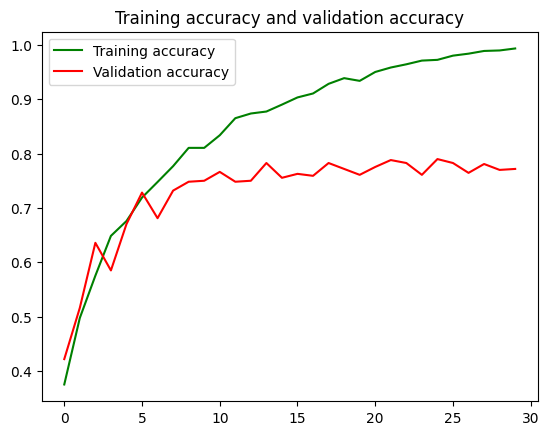

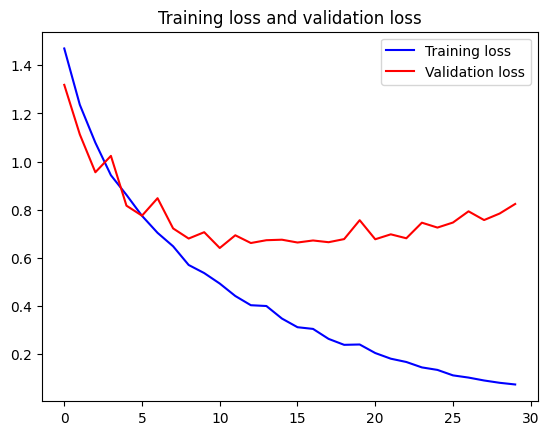

In [29]:
accuracy=history.history['accuracy']
validation_accuracy=history.history['val_accuracy']
loss=history.history['loss']
validation_loss=history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation accuracy')
plt.title('Training accuracy and validation accuracy')
plt.legend(loc=0)
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training loss and validation loss')
plt.legend(loc=0)
plt.show()

Saving WhatsApp Image 2023-05-30 at 23.38.01.jpeg to WhatsApp Image 2023-05-30 at 23.38.01.jpeg


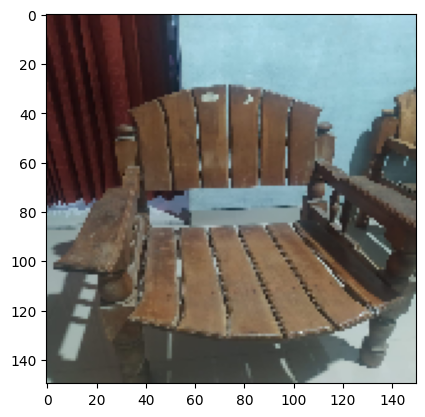

1/1 [==============================] - 0s 36ms/step
Objek adalah : Kursiyun
Persentase: 77.74%


In [32]:
import keras.utils as image
from google.colab import files

class_labels = ['Kursiyun', 'Maktabun', 'Qolamun', 'Saatun', 'Sabburotun']

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show()
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return img

def predict_image(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    percentage = prediction[0][predicted_class] * 100
    print('Objek adalah :', predicted_label)
    txt = 'Persentase: {:.2f}%'
    print(txt.format(percentage))

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = '/content/' + fn
    predict_image(img_path)

Saving WhatsApp Image 2023-05-30 at 23.42.07.jpeg to WhatsApp Image 2023-05-30 at 23.42.07.jpeg


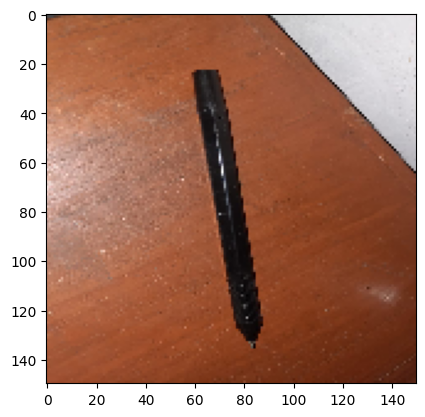

1/1 [==============================] - 0s 38ms/step
Objek adalah : Qolamun
Persentase: 98.61%


In [31]:
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = '/content/' + fn
    predict_image(img_path)

Saving WhatsApp Image 2023-05-31 at 00.37.56.jpeg to WhatsApp Image 2023-05-31 at 00.37.56.jpeg


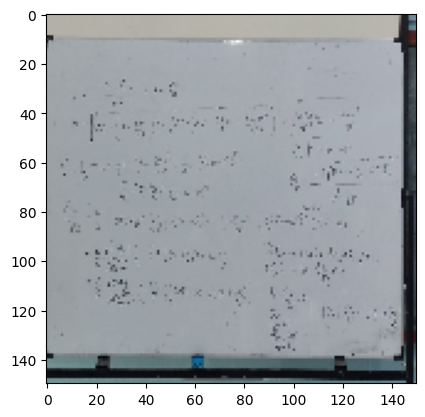

1/1 [==============================] - 0s 60ms/step
Objek adalah : Sabburotun
Persentase: 98.81%


In [33]:
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = '/content/' + fn
    predict_image(img_path)

Saving Jual-Meja-Café-Jati.jpg to Jual-Meja-Café-Jati.jpg


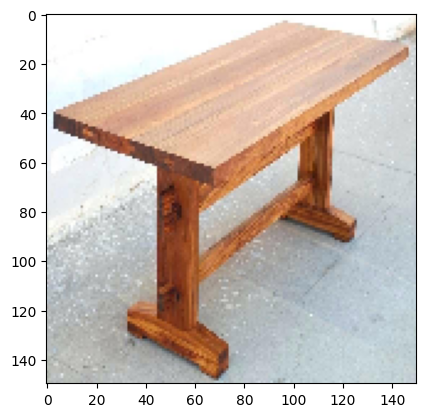

1/1 [==============================] - 0s 38ms/step
Objek adalah : Maktabun
Persentase: 99.95%


In [34]:
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = '/content/' + fn
    predict_image(img_path)

Saving 1ec86790-abc3-4a44-9e0a-77ebe32df673.jpg to 1ec86790-abc3-4a44-9e0a-77ebe32df673.jpg


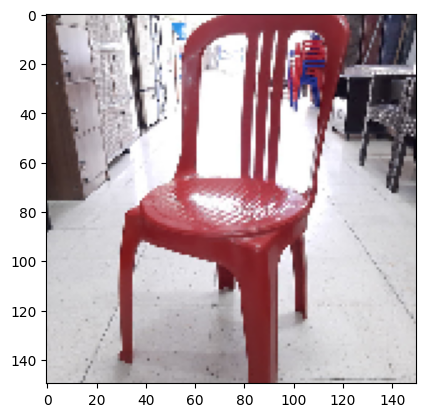

1/1 [==============================] - 0s 36ms/step
Objek adalah : Kursiyun
Persentase: 85.34%


In [35]:
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = '/content/' + fn
    predict_image(img_path)

Saving jam-mirado.1631848106.jpg to jam-mirado.1631848106.jpg


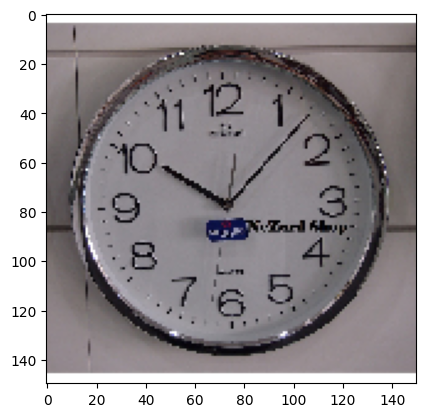

1/1 [==============================] - 0s 36ms/step
Objek adalah : Saatun
Persentase: 99.88%


In [36]:
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = '/content/' + fn
    predict_image(img_path)

# **SAVE MODEL**

In [37]:
model.save('object_classification_ArabKu.h5')
print('Model Saved!')

Model Saved!


# **LOAD MODEL**

In [38]:
savedModel=load_model('object_classification_ArabKu.h5')
savedModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

# **Convert to Tensorflow Lite**

In [39]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)